In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(25,10)})

In [2]:
our_color_palette ={"WT": "#F2C14E", "KO": "#F15BB5", "OE": "#368F8B"}
genotype_dict = {"dicer_ko": "KO", "dicer_overexpressed": "OE", "wild_type": "WT"}

### import all mutations

In [3]:
# import mutations and annotated mutations

fname_mutations_all_samples = 'mutations_of_all_samples_after_filtering.csv'

df = pd.read_csv(fname_mutations_all_samples)
df = df.drop(['Unnamed: 0'], axis=1)

df = df[df['genotype']!='aaa_parental_stock']
df["genotype"] = df["genotype"].apply(lambda x: genotype_dict[x])


df['mutation_id'] = df['Pos'].astype('str')+df['Var']
df['line_id'] = df['genotype']+'_'+df['replicate']

### import non-synonymous mutations

In [4]:
# import annotated mutations 

fname_mutations_all_samples_annotated = 'annotated_mutations_of_all_samples_after_filtering.csv'

df_nonsyn = pd.read_csv(fname_mutations_all_samples_annotated)
df_nonsyn = df_nonsyn.drop(['Unnamed: 0'], axis=1)

df_nonsyn = df_nonsyn[df_nonsyn['genotype']!='aaa_parental_stock']
df_nonsyn["genotype"] = df_nonsyn["genotype"].apply(lambda x: genotype_dict[x])


df_nonsyn['mutation_id'] = df_nonsyn['POS'].astype('str')+df_nonsyn['ALT']
df_nonsyn['line_id'] = df_nonsyn['genotype']+'_'+df_nonsyn['replicate']

In [5]:
# filter for non-synonymous mutations
df_nonsyn = df_nonsyn[df_nonsyn['IsSynonymous']==0]

### filter mutations with minimum_frequency_threshold = 0.0001 = 0.01%

In [6]:
# minimum mutation frequency
df_venn = df[df['frequency']>=0.0001]
df_venn_nonsyn = df_nonsyn[df_nonsyn['frequency']>=0.0001]

#### Venn diagram over all mutations

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_35593/1223313737.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


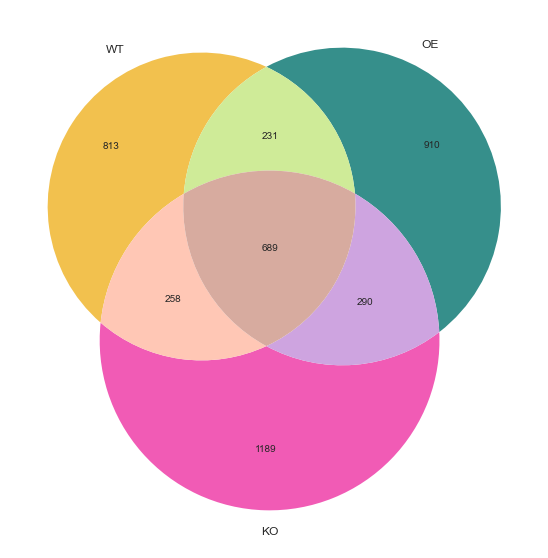

In [7]:
mutations_WT = set(df_venn[df_venn['genotype']=="WT"]["mutation_id"].to_list())
mutations_OE = set(df_venn[df_venn['genotype']=="OE"]["mutation_id"].to_list())
mutations_KO = set(df_venn[df_venn['genotype']=="KO"]["mutation_id"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'
 
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,10))
venn3(subsets=[mutations_WT, mutations_OE, mutations_KO], 
      set_labels=('WT', 'OE', 'KO'),
      set_colors=('#F2C14E', '#368F8B', '#F15BB5'),
      alpha=1
     )

plt.show()

In [8]:
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq0.01%_all_muts.pdf")
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq0.01%_all_muts.svg")

#### Venn diagram over non-syn mutations

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_35593/2695228917.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


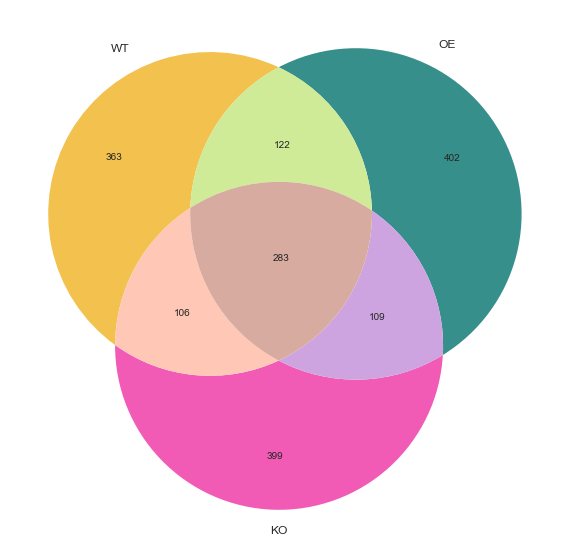

In [9]:
mutations_WT = set(df_venn_nonsyn[df_venn_nonsyn['genotype']=="WT"]["mutation_id"].to_list())
mutations_OE = set(df_venn_nonsyn[df_venn_nonsyn['genotype']=="OE"]["mutation_id"].to_list())
mutations_KO = set(df_venn_nonsyn[df_venn_nonsyn['genotype']=="KO"]["mutation_id"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'
 
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,10))
venn3(subsets=[mutations_WT, mutations_OE, mutations_KO], 
      set_labels=('WT', 'OE', 'KO'),
      set_colors=('#F2C14E', '#368F8B', '#F15BB5'),
      alpha=1
     )

plt.show()

In [10]:
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq0.01%_nonsyn.pdf")
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq0.01%_nonsyn.svg")

### filter mutations with minimum_frequency_threshold = 0.1 = 10%

In [11]:
# minimum mutation frequency
df_venn = df[df['frequency']>=0.1]
df_venn_nonsyn = df_nonsyn[df_nonsyn['frequency']>=0.1]

#### Venn diagram over all mutations

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_35593/245505529.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


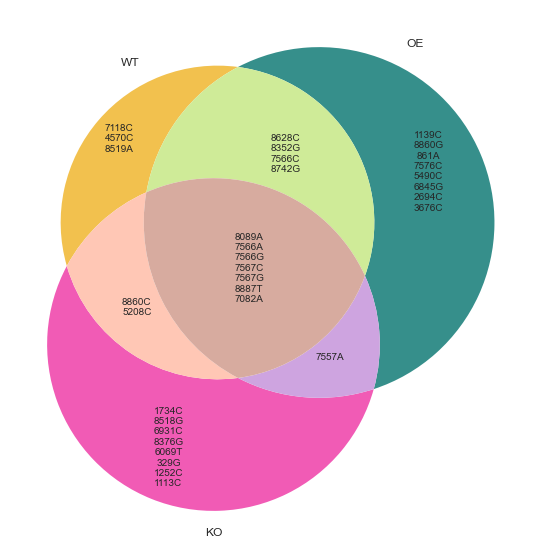

In [12]:
mutations_WT = set(df_venn[df_venn['genotype']=="WT"]["mutation_id"].to_list())
mutations_OE = set(df_venn[df_venn['genotype']=="OE"]["mutation_id"].to_list())
mutations_KO = set(df_venn[df_venn['genotype']=="KO"]["mutation_id"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'
 
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,10))
venn = venn3(subsets=[mutations_WT, mutations_OE, mutations_KO], 
      set_labels=('WT', 'OE', 'KO'),
      set_colors=('#F2C14E', '#368F8B', '#F15BB5'),
      alpha=1
     )

set1= mutations_WT
set2=mutations_OE
set3=mutations_KO

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))

plt.show()

In [13]:
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq10%_all_muts.pdf")
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq10%_all_muts.svg")

#### Venn diagram over non-syn mutations

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_35593/3491502803.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


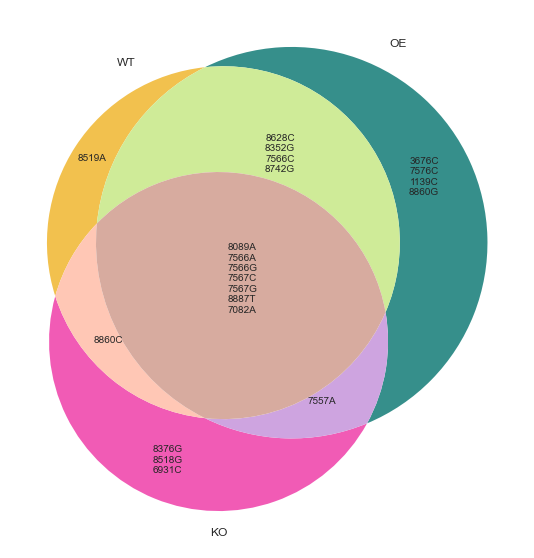

In [14]:

mutations_WT = set(df_venn_nonsyn[df_venn_nonsyn['genotype']=="WT"]["mutation_id"].to_list())
mutations_OE = set(df_venn_nonsyn[df_venn_nonsyn['genotype']=="OE"]["mutation_id"].to_list())
mutations_KO = set(df_venn_nonsyn[df_venn_nonsyn['genotype']=="KO"]["mutation_id"].to_list())

# 'wild type', color='#F2C14E'
# 'dicer overexpressed', color='#368F8B'
# 'dicer knockdown', color='#F15BB5'
 
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,10))
venn = venn3(subsets=[mutations_WT, mutations_OE, mutations_KO], 
      set_labels=('WT', 'OE', 'KO'),
      set_colors=('#F2C14E', '#368F8B', '#F15BB5'),
      alpha=1
     )

set1=mutations_WT
set2=mutations_OE
set3=mutations_KO

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))

plt.show()


In [15]:
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq10%_nonsyn.pdf")
fig.savefig("./000__Manuscript_figures/Figure_3C__venn_diagram_freq10%_nonsyn.svg")